In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.mixture import GaussianMixture
from helpers.iaml01cw2_helpers import *

/afs/inf.ed.ac.uk/user/s18/s1864480/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
%matplotlib inline

In [3]:
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2("data/")

In [12]:
# 3.1
kmeans = KMeans(n_clusters=22, random_state=1)
kmeans.fit(Xtrn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [13]:
Y_kmeans = kmeans.predict(Xtrn)

In [14]:
clusters = kmeans.cluster_centers_

In [15]:
num_samples = {}
sum_squared_dists = {}
for i in range(22):
    mask = Y_kmeans == i
    center_i = Xtrn[mask]
    num_samples[i] = center_i.shape[0]
    pair_dists = pairwise_distances(center_i, clusters[i].reshape(1,-1))
    pair_dists_sum = np.sum(pair_dists, axis=0)[0]
    sum_squared_dists[i] = pair_dists_sum

In [16]:
num_samples

{0: 1018,
 1: 1125,
 2: 1191,
 3: 890,
 4: 1162,
 5: 1332,
 6: 839,
 7: 623,
 8: 1400,
 9: 838,
 10: 659,
 11: 1276,
 12: 121,
 13: 152,
 14: 950,
 15: 1971,
 16: 1251,
 17: 845,
 18: 896,
 19: 930,
 20: 1065,
 21: 1466}

In [17]:
sum_squared_dists

{0: 1182.0398,
 1: 1360.9644,
 2: 1457.4814,
 3: 1206.8549,
 4: 1412.8635,
 5: 1575.6184,
 6: 1169.6694,
 7: 991.5261,
 8: 1641.1821,
 9: 1200.4832,
 10: 715.7619,
 11: 1517.0513,
 12: 196.9747,
 13: 247.06387,
 14: 1290.1027,
 15: 2164.1633,
 16: 1615.7766,
 17: 1229.8411,
 18: 1101.7834,
 19: 1346.9763,
 20: 1421.5784,
 21: 1743.0022}

In [18]:
# 3.2
pca_2 = PCA(n_components=2).fit(Xtrn)

In [19]:
mean_vecs = np.zeros_like(clusters)
for i in range(22):
    mask = Ytrn == i
    lang_i = Xtrn[mask]
    mean_lang_i = lang_i.mean(axis=0)
    mean_vecs[i] = mean_lang_i

In [20]:
mean_vecs_transformed = pca_2.transform(mean_vecs)

In [21]:
mean_vecs_transformed

array([[-0.77407587,  0.08716869],
       [ 0.15398663,  0.17686303],
       [ 0.01303709, -0.01052516],
       [ 0.5506966 ,  0.00823785],
       [-0.2727391 ,  0.06936921],
       [-0.0517763 ,  0.24727471],
       [-0.5540025 , -0.11999208],
       [-0.12691943, -0.16446877],
       [ 0.24007958,  0.00542204],
       [-0.22838189, -0.27274877],
       [ 0.19038028,  0.14132892],
       [ 0.4373845 ,  0.0498362 ],
       [ 0.94492733, -0.1232627 ],
       [-0.41575825, -0.08047332],
       [-0.04823224,  0.21420513],
       [-0.14780849, -0.11581946],
       [ 0.7979029 , -0.33142594],
       [-0.33703202,  0.05063612],
       [ 0.14669593,  0.6614704 ],
       [-0.46374497, -0.14437011],
       [ 0.06094959, -0.31680295],
       [-0.11025876, -0.03146841]], dtype=float32)

In [22]:
clusters_transformed = pca_2.transform(clusters)

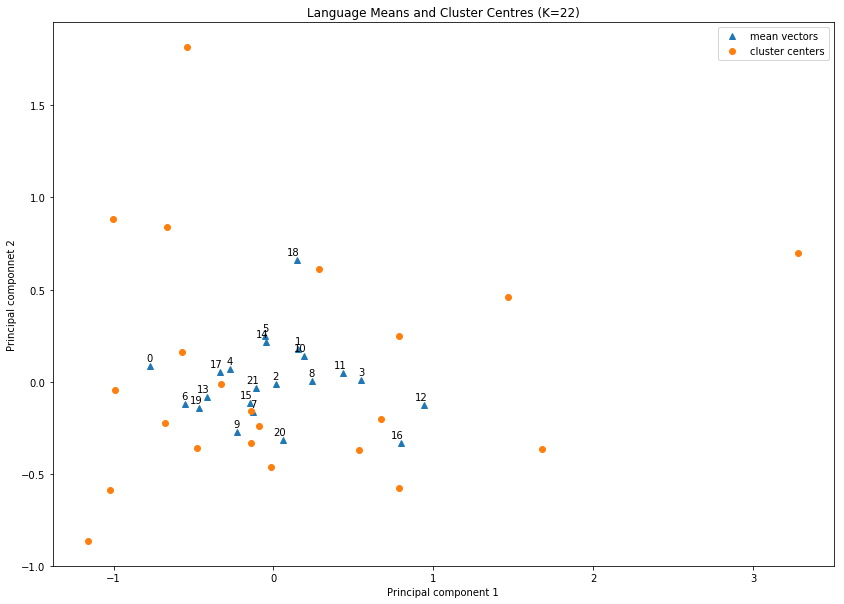

In [26]:
plt.figure(figsize=(14, 10))
plt.plot(mean_vecs_transformed[:, 0], mean_vecs_transformed[:, 1], '^', label="mean vectors")
plt.plot(clusters_transformed[:, 0], clusters_transformed[:, 1], 'o', label="cluster centers")

for i in range(22):
    plt.annotate(i, xy=(mean_vecs_transformed[i]), xytext=(3, 3), textcoords='offset points', ha='right', va='bottom')
    
plt.xlabel("Principal component 1")
plt.ylabel("Principal componnet 2")
plt.title("Language Means and Cluster Centres (K=22)")
plt.legend()
plt.savefig("results/3_2.png")
plt.show()

In [185]:
mean_vecs.shape

(22, 26)

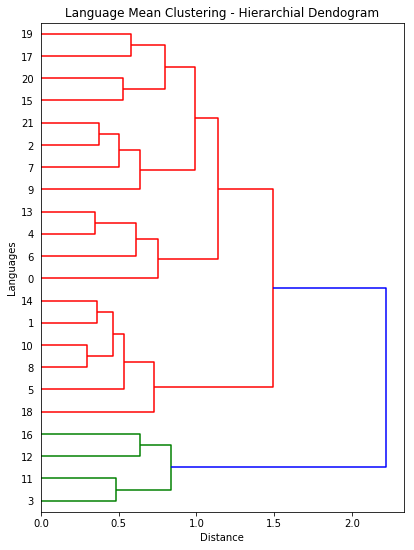

In [27]:
# 3.3
Z = hierarchy.linkage(mean_vecs, method="ward")
labels = range(22)
plt.figure(figsize=(6.5, 9))
hierarchy.dendrogram(Z, labels=labels, distance_sort="descending", orientation="right", show_leaf_counts=True)
plt.ylabel("Languages")
plt.xlabel("Distance")
plt.title("Language Mean Clustering - Hierarchial Dendogram")
plt.savefig("results/3_3.png")
plt.show()

In [178]:
# 3.4
vecs = None
for k in range(22):
    kmeans_k = KMeans(n_clusters=3, random_state=1).fit(Xtrn[Ytrn == k])
    clusters_k = kmeans_k.cluster_centers_
    if vecs is None:
        vecs = clusters_k
    else:
        vecs = np.concatenate((vecs, clusters_k), axis=0)

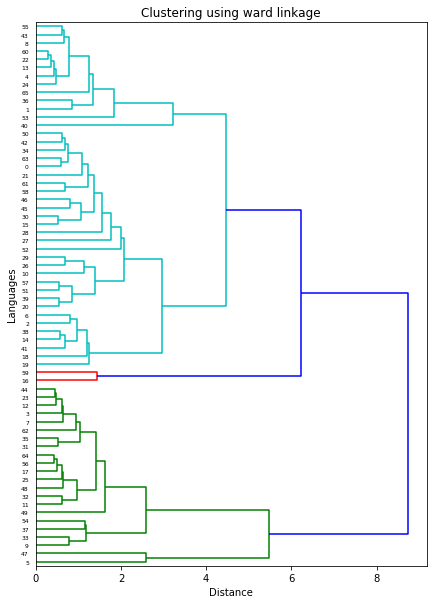

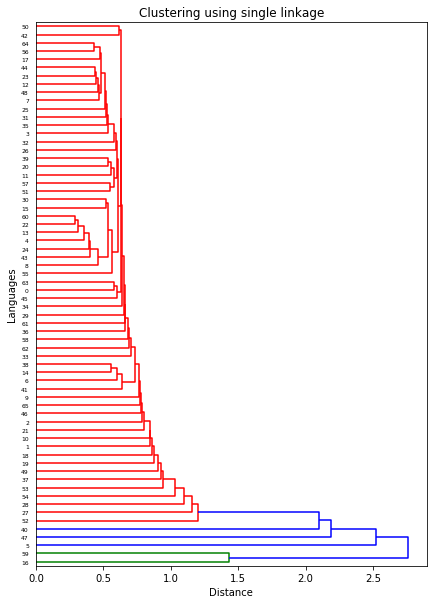

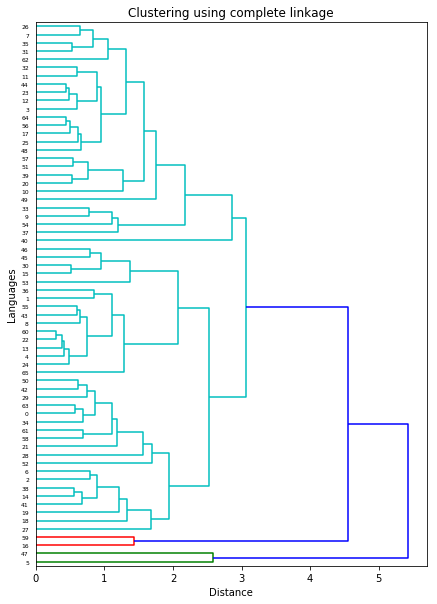

In [205]:
# 3.4
for method in ["ward", "single", "complete"]:
    plt.figure(figsize=(7, 10))
    Z = hierarchy.linkage(vecs, method=method)
    labels = str(range(22))
    hierarchy.dendrogram(Z, distance_sort="descending", orientation="right", show_leaf_counts=True)
    plt.title(f"Clustering using {method} linkage")
    plt.ylabel("Languages")
    plt.xlabel("Distance")
    plt.savefig(f"results/3_4_{method}.png")
    plt.show()

In [4]:
language_0 = Xtrn[Ytrn == 0]
language_0_test = Xtst[Ytst == 0]

In [5]:
gmm = GaussianMixture(n_components=1, covariance_type='diag').fit(language_0)

In [6]:
log_likelihoods_ = []
cv_types = ["diag", "full"]
n_components = np.array([1, 3, 5, 10, 15])
for n in n_components:
    for cv_type in cv_types:
        gmm_n = GaussianMixture(n_components=n, covariance_type=cv_type).fit(language_0)
        log_likelihoods_.extend([gmm_n.score(language_0), gmm_n.score(language_0_test)])
    

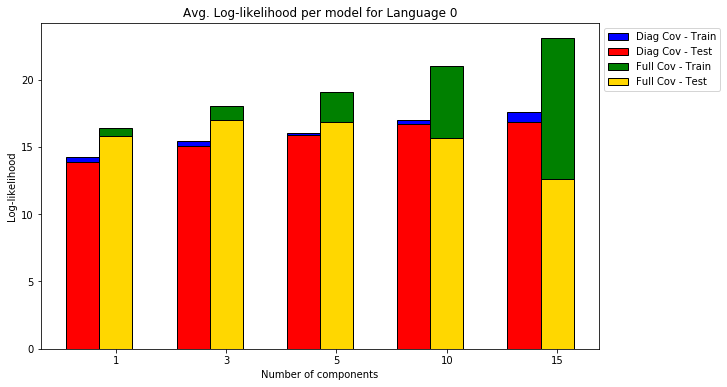

In [8]:
w = 0.3
xi = np.arange(len(n_components))
y = log_likelihoods_[0::4]
z = log_likelihoods_[1::4]
k = log_likelihoods_[2::4]
l = log_likelihoods_[3::4]

plt.figure(figsize=(10, 6))

plt.bar(xi - w, y, width=w, color='b', align='center', edgecolor="k", label= "Diag Cov - Train")
plt.bar(xi - w, z, width=w, color='r', align='center', edgecolor="k", label= "Diag Cov - Test")
plt.bar(xi, k, width=w, color='g', align='center', edgecolor="k", label= "Full Cov - Train")
plt.bar(xi, l, width=w, color='gold', align='center', edgecolor="k", label= "Full Cov - Test")

plt.xticks(xi, n_components)
plt.ylabel("Log-likelihood")
plt.xlabel("Number of components")
plt.title("Avg. Log-likelihood per model for Language 0")
lgnd = plt.legend(bbox_to_anchor=(1, 1))

plt.savefig("results/3_5.png", bbox_extra_artists=[lgnd], bbox_inches="tight")
plt.show()